In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import re

# matplotlib ÌïúÍ∏Ä Íπ®Ïßê Î¨∏Ï†ú Ìï¥Í≤∞
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [160]:
# ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú ÎßåÎìúÎäî ÏΩîÎìú
def generate_wordcloud(text, picture):
    okt = Okt()
    line = []
    line = okt.pos(text)
    stop_words = 'ÏòàÏïΩ Ïñ¥Ìîå'
    n_adj = []
    for word, tag in line:
        if tag in ['Noun','Adjective']:
            if len(word)>1:
                n_adj.append(word)

    # print(n_adj) -> word cloudÎßå ÎÇòÏò§Í≤å ÌïòÍ∏∞ ÏúÑÌïòÏó¨ ÏùºÏãúÏ†ÅÏúºÎ°ú Ï£ºÏÑùÏ≤òÎ¶¨. //

    stop_words = set(stop_words.split(' '))
    n_adj = [word for word in n_adj if not word in stop_words] # Î∂àÏö©Ïñ¥Î•º Ï†úÏô∏Ìïú Îã®Ïñ¥Îßå ÎÇ®Í∏∞Í∏∞
    # Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò® Îã®Ïñ¥ 100Í∞ú Ï†ÄÏû•
    counts = Counter(n_adj)
    global tags
    tags = counts.most_common(100) # ÏÉÅÏúÑ Í∞ØÏàòÎßå Ï†ÑÎã¨.
    # print(tags) #-> ÎπàÎèÑÏàòÎ•º ÌôïÏù∏ÌïòÍ≥† Ïã∂ÏùÑ Í≤ΩÏö∞ÏóêÎäî Ï£ºÏÑù Ìï¥Ï†ú

    #ÏãúÍ∞ÅÌôî
    path =  './NanumBarunGothic.ttf' # Ìè∞Ìä∏Í∞Ä Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî ÏúÑÏπò
    if picture =='apple':
        masking_image = np.array(Image.open('./rainbow_apple.jpg'))
    else:
        masking_image = np.array(Image.open('./tabling_application.jpeg'))
    word_cloud = WordCloud(font_path = path, background_color = 'white', max_font_size = 400, mask=masking_image, width=600, height=400).generate_from_frequencies(dict(tags))
    # word_cloud Ïùò Argument ÏóêÎäî colormap='coolwarm' Î•º Ï†úÏô∏ÌïòÏòÄÎã§. ÏôúÎÉêÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅÏùÑ Í∑∏ÎåÄÎ°ú text color Ïóê generate ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú
    image_colors = ImageColorGenerator(masking_image)
    word_cloud = word_cloud.recolor(color_func=image_colors)
    plt.figure(figsize=(10,8), facecolor='black')
    plt.imshow(word_cloud,interpolation='bilinear') # ÏÑ†ÌòïÎ≥¥Í∞ÑÎ≤ï Ïù¥ÎùºÍ≥†ÎèÑ ÌïúÎã§.
    plt.axis('off')
    plt.show()

In [161]:
df = pd.read_csv("./CARD_SUBWAY_MONTH_202309.csv",encoding="utf-8")
column = df.columns 
df.reset_index(inplace=True)
df.drop(['Îì±Î°ùÏùºÏûê'],axis=1,inplace=True)
df.columns = column
df

ÏÇ¨Ïö©ÏùºÏûê  ÎÖ∏ÏÑ†Î™Ö    Ïó≠Î™Ö  ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò  ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò      Îì±Î°ùÏùºÏûê
0      20230901  8Ìò∏ÏÑ†    ÏÑùÏ¥å    8717   10257  20230904
1      20230901  8Ìò∏ÏÑ†    ÏÜ°Ìåå   10608   10097  20230904
2      20230901  8Ìò∏ÏÑ†  Í∞ÄÎùΩÏãúÏû•    8858    9967  20230904
3      20230901  8Ìò∏ÏÑ†    Î¨∏Ï†ï   23576   24374  20230904
4      20230901  8Ìò∏ÏÑ†    Ïû•ÏßÄ   19342   17388  20230904
...         ...  ...   ...     ...     ...       ...
18297  20230930  Ï§ëÏïôÏÑ†    ÏñëÏàò    2089    1892  20231003
18298  20230930  Ï§ëÏïôÏÑ†    Ïã†Ïõê     377     277  20231003
18299  20230930  Ï§ëÏïôÏÑ†    Íµ≠Ïàò     591     495  20231003
18300  20230930  Ï§ëÏïôÏÑ†    ÏïÑÏã†     685     572  20231003
18301  20230930  Ï§ëÏïôÏÑ†    Ïò§Îπà     285     255  20231003

[18302 rows x 6 columns]

In [162]:
display(df['Ïó≠Î™Ö'].duplicated().sum())
# ÌôòÏäπÍ∞ÄÎä•Ìïú Ïó≠Ïùº Í≤ΩÏö∞, Ï§ëÎ≥µÌï¥ÏÑú Ïó≠Î™ÖÏù¥ Îì§Ïñ¥Í∞ê.

17778

In [163]:
df_v1 = df.groupby('Ïó≠Î™Ö')[['ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò']].mean()
df_v1 = df_v1.sort_values(by=['ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò', 'ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò'],ascending=False).head()

In [164]:
df_v1

ÏäπÏ∞®Ï¥ùÏäπÍ∞ùÏàò        ÌïòÏ∞®Ï¥ùÏäπÍ∞ùÏàò
Ïó≠Î™Ö                                     
Í∞ïÎÇ®           70991.800000  68606.600000
Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄ      51572.133333  50793.266667
ÏÇºÏÑ±(Î¨¥Ïó≠ÏÑºÌÑ∞)     48372.966667  48702.333333
ÏÑúÏö∏ÎåÄÏûÖÍµ¨(Í¥ÄÏïÖÍµ¨Ï≤≠)  43718.833333  42154.633333
ÏùÑÏßÄÎ°úÏûÖÍµ¨        43526.533333  44016.833333

### ÏäπÏ∞® ÌïòÏ∞®ÏàòÍ∞Ä Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 5Í∞úÏùò Ïó≠ÏùÄ ÏÑúÏö∏Ïó≠, Ïû†Ïã§(ÏÜ°ÌååÍµ¨Ï≤≠)Ïó≠, ÌôçÎåÄÏûÖÍµ¨Ïó≠, Í≥†ÏÜçÌÑ∞ÎØ∏ÎÑêÏó≠, Í∞ïÎÇ®Ïó≠ Ï¥ù 5Í∞úÏù¥Îã§.

In [165]:
df2 = pd.read_csv("./ÏÑúÏö∏Ïãú ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥Ñ Ïó≠Î≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏäπÌïòÏ∞® Ïù∏Ïõê Ï†ïÎ≥¥.csv",encoding="euc-kr")
df2.drop('ÏûëÏóÖÏùºÏûê',axis=1,inplace=True) # ÏûëÏóÖÏùºÏûêÎäî Îç∞Ïù¥ÌÑ∞Î•º Ïñ¥Îäê ÎÇ†Ïóê ÏûÖÎ†•ÌñàÎäîÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥Ïù¥Í≥†, Î∂ÑÏÑùÏóê ÏûàÏñ¥ÏÑú ÏßÅÏ†ëÏ†ÅÏù∏ ÌïÑÏöîÎäî ÏóÜÎã§.

In [166]:
df2[df2['ÏßÄÌïòÏ≤†Ïó≠']=='ÌôçÎåÄÏûÖÍµ¨'].head(2)

ÏÇ¨Ïö©Ïõî  Ìò∏ÏÑ†Î™Ö  ÏßÄÌïòÏ≤†Ïó≠  04Ïãú-05Ïãú ÏäπÏ∞®Ïù∏Ïõê  04Ïãú-05Ïãú ÌïòÏ∞®Ïù∏Ïõê  05Ïãú-06Ïãú ÏäπÏ∞®Ïù∏Ïõê  \
59   202309  2Ìò∏ÏÑ†  ÌôçÎåÄÏûÖÍµ¨          1069            25         29024   
420  202309  Í≤ΩÏùòÏÑ†  ÌôçÎåÄÏûÖÍµ¨             3             0           403   

     05Ïãú-06Ïãú ÌïòÏ∞®Ïù∏Ïõê  06Ïãú-07Ïãú ÏäπÏ∞®Ïù∏Ïõê  06Ïãú-07Ïãú ÌïòÏ∞®Ïù∏Ïõê  07Ïãú-08Ïãú ÏäπÏ∞®Ïù∏Ïõê  ...  \
59           3391         32350         15564         60058  ...   
420           153          1006           654          1598  ...   

     23Ïãú-24Ïãú ÏäπÏ∞®Ïù∏Ïõê  23Ïãú-24Ïãú ÌïòÏ∞®Ïù∏Ïõê  00Ïãú-01Ïãú ÏäπÏ∞®Ïù∏Ïõê  00Ïãú-01Ïãú ÌïòÏ∞®Ïù∏Ïõê  01Ïãú-02Ïãú ÏäπÏ∞®Ïù∏Ïõê  \
59          91560         48413         12357         18470            11   
420          2759          1602            33           222             0   

     01Ïãú-02Ïãú ÌïòÏ∞®Ïù∏Ïõê  02Ïãú-03Ïãú ÏäπÏ∞®Ïù∏Ïõê  02Ïãú-03Ïãú ÌïòÏ∞®Ïù∏Ïõê  03Ïãú-04Ïãú ÏäπÏ∞®Ïù∏Ïõê  03Ïãú-04Ïãú ÌïòÏ∞®Ïù∏Ïõê  
59           1450             0             0             0             0  
420             0             0             0             0             0  

[2 rows x 51 columns]

In [167]:
# ÏúÑÏùò Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ÏÑú ÏäπÌïòÏ∞® Ïù∏ÏõêÏù¥ Í∞ÄÏû• ÎßéÏùÄ ÏÉÅÏúÑ 5Í∞ú Ïó≠Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏäπÌïòÏ∞® Ïù∏Ïõê Î∂ÑÏÑù
stations = list(df_v1.index)
# Í∞ôÏùÄ Ïó≠Îì§ÏùÑ Î≥¥Î©¥, 
filtered_df = df2[df2['ÏßÄÌïòÏ≤†Ïó≠'].isin(stations)]
filtered_df = filtered_df[filtered_df['ÏÇ¨Ïö©Ïõî'] == 202309]

In [168]:
# Î¨∏ÏûêÏó¥Ïùò Í≤ΩÏö∞ Ìï©Ï≥êÏßà Îïå, ','Î•º Î∂ôÏù¥Îäî Í≤ÉÏúºÎ°ú, ÎÇòÎ®∏ÏßÄ Ïà´ÏûêÎäî Ìï©ÏÇ∞.
result = filtered_df.groupby('ÏßÄÌïòÏ≤†Ïó≠').agg(lambda x: ', '.join(x) if x.dtype=='object' else x.sum())

C:\Users\dda28\AppData\Local\Temp\ipykernel_1356\2531419563.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(take['ÏãúÍ∞ÑÎåÄ'].unique(), rotation=60)  # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
C:\Users\dda28\AppData\Local\Temp\ipykernel_1356\2531419563.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(get_off['ÏãúÍ∞ÑÎåÄ'].unique(), rotation=60)  # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ


Text(0.5, 1.0, 'Ï†êÏã¨ÏãúÍ∞Ñ(11~14Ïãú), Ï†ÄÎÖÅÏãúÍ∞Ñ(18~21Ïãú) ÌïòÏ∞® Ïù∏Ïõê')

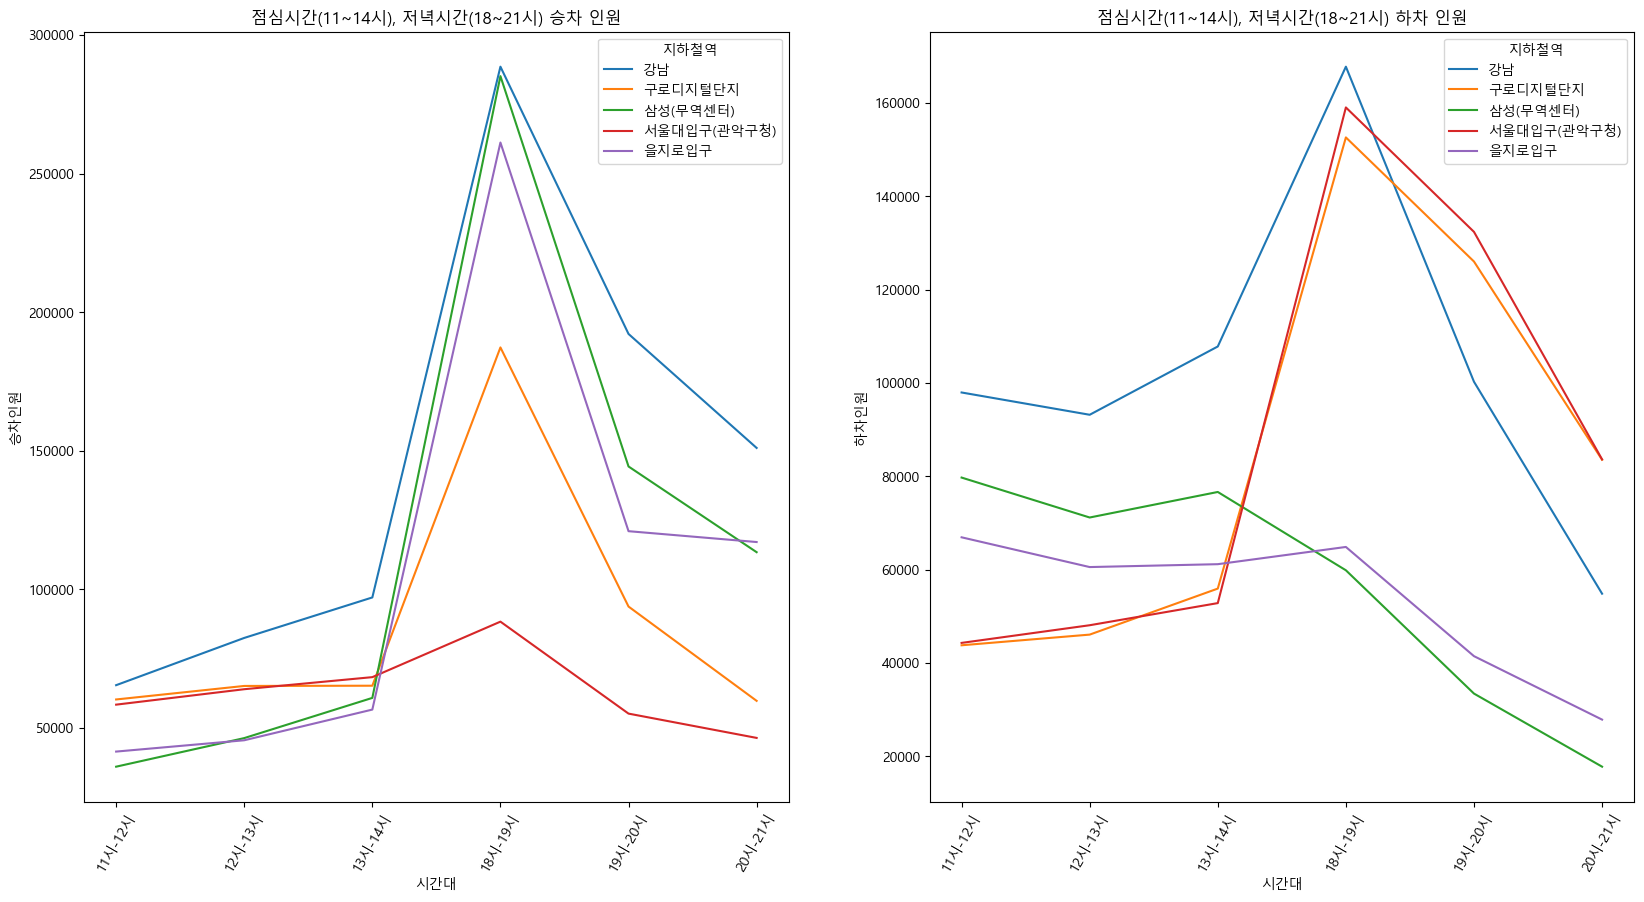

In [169]:
# Ï†êÏã¨ÏãúÍ∞ÑÏùÄ 11Ïãú ~ 14Ïãú, Í∑∏Î¶¨Í≥† Ï†ÄÎÖÅÏãúÍ∞ÑÏùÄ 18Ïãú ~ 21Ïãú ÍπåÏßÄÎ°ú Ï†ïÌïúÎã§.
time_columns = result.columns[16:22].append(result.columns[30:36])
take = result[time_columns[::2]].reset_index().melt(id_vars="ÏßÄÌïòÏ≤†Ïó≠",var_name='ÏãúÍ∞ÑÎåÄ', value_name='ÏäπÏ∞®Ïù∏Ïõê').applymap(
    lambda x: x.replace(' ÏäπÏ∞®Ïù∏Ïõê', '') if isinstance(x, str) else x)
get_off = result[time_columns[1::2]].reset_index().melt(id_vars="ÏßÄÌïòÏ≤†Ïó≠",var_name='ÏãúÍ∞ÑÎåÄ', value_name='ÌïòÏ∞®Ïù∏Ïõê').applymap(
    lambda x: x.replace(' ÌïòÏ∞®Ïù∏Ïõê', '') if isinstance(x, str) else x)

fig, axes = plt.subplots(1, 2, figsize=(20,10))


sns.lineplot(x='ÏãúÍ∞ÑÎåÄ', y='ÏäπÏ∞®Ïù∏Ïõê', hue='ÏßÄÌïòÏ≤†Ïó≠', data=take, ax=axes[0])
axes[0].set_xticklabels(take['ÏãúÍ∞ÑÎåÄ'].unique(), rotation=60)  # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
axes[0].set_title("Ï†êÏã¨ÏãúÍ∞Ñ(11~14Ïãú), Ï†ÄÎÖÅÏãúÍ∞Ñ(18~21Ïãú) ÏäπÏ∞® Ïù∏Ïõê")
sns.lineplot(x='ÏãúÍ∞ÑÎåÄ', y='ÌïòÏ∞®Ïù∏Ïõê', hue='ÏßÄÌïòÏ≤†Ïó≠', data=get_off, ax=axes[1])
axes[1].set_xticklabels(get_off['ÏãúÍ∞ÑÎåÄ'].unique(), rotation=60)  # xÏ∂ï ÎùºÎ≤® ÌöåÏ†Ñ
axes[1].set_title("Ï†êÏã¨ÏãúÍ∞Ñ(11~14Ïãú), Ï†ÄÎÖÅÏãúÍ∞Ñ(18~21Ïãú) ÌïòÏ∞® Ïù∏Ïõê")

### ÏäπÏ∞® Ïù∏Ïõê ÌïòÏ∞® Ïù∏Ïõê Î™®Îëê Ï†êÏã¨ÏãúÍ∞Ñ Î≥¥Îã§ Ï†ÄÎÖÅÏãúÍ∞ÑÎïåÏóê Îçî ÎßéÏúºÎ©∞, Ï†ÄÎÖÅÏãúÍ∞Ñ ÎïåÏóê ÏäπÏ∞® Ïù∏Ïõê ÎåÄÎã§ÏàòÎäî ÏÑúÏö∏Ïó≠ÏóêÏÑú ÏäπÏ∞®ÌïòÎ©∞ ÌïòÏ∞® Ïù∏Ïõê ÎåÄÎã§ÏàòÎäî ÌôçÎåÄ ÏûÖÍµ¨ÏóêÏÑú ÎÇ¥Î¶¨Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.

# Ïù∏Ïä§ÌÉÄÍ∑∏Îû®Ïóê Ïõ®Ïù¥ÌåÖ ÌÉúÍ∑∏Î°ú ÏûàÎäî ÎßõÏßëÎì§Ïùò Î∂ÑÌè¨Îäî Ïñ¥ÎñªÍ≤å Îê†Íπå?

In [170]:
insta_post = pd.read_csv("./Ïù∏Ïä§ÌÉÄÍ∑∏Îû® Ïõ®Ïù¥ÌåÖ Ìï¥ÏãúÌÉúÍ∑∏ Ïó∞Í¥Ä Í≤åÏãúÍ∏Ä.csv")
insta_post.head()

Í≤åÏãúÍ∏Ä
0  ÎåÄÍµ¨ ÏàòÏÑ±Íµ¨ ÎßõÏßë ÏïåÏïÑÎ≥¥Îã§Í∞Ä Î∞úÍ≤¨Ìïú Ï†ÅÎèà Îì§ÏïàÍ∏∏Ï†ê. ÏöîÏ¶ò Í≥†Í∏∞Î•º ÏûêÏ£º Î®πÏúºÎü¨ Í∞ÄÎäî ...
1  Ïû†Ïã§ Í∞úÎÇòÎ¶¨ÏïÑÍµ¨Ï∞ú Î≥∏Ï†ê Ïõ®Ïù¥ÌåÖ...\n.\n.\n.\n#Ìï´Ìîå#Ìï´ÌîåÎ†àÏù¥Ïä§#Ïû†Ïã§#Ïû†Ïã§Îßõ...
2  Ïõ®Ïù¥ÌåÖÏù¥ ÎßéÏïÑÏÑú Îã§Ïùå Í∏∞ÌöåÏóê‚Ä¶ÌõÑ\n\n#ÎÖ∏ÏõêÎßõÏßë #Î™©Í≥†Í∏∞Ïßë #Ïõ®Ïù¥ÌåÖ #ÎÖ∏ÏõêÍµ¨ÎßõÏßë #...
3  Ïò§ÎäòÏùÄ ÏÑúÏö∏Ìé∏\n\nÏïÑÎ¨¥Î¶¨ Í∑∏ÎûòÎèÑ ÏÉàÎ≤Ω ÌïúÏãúÎ∞òÏóê Ïù¥Îü∞ Ïõ®Ïù¥ÌåÖÏùÄ ÎÑàÎ¨¥ ÌïúÍ±∞ ÏïÑÎãàÏò§??...
4  ‚†Ä\nÎ∞îÏßÄÎùΩÎ∞îÏßÄÎùΩ...\nÎ∞îÏßÄÎùΩÏù¥ Ïñ¥ÎßàÏñ¥ÎßàÌïòÎã§\nÎ∞îÏßÄÎùΩ ÍπåÎäêÎùº Ïõ®Ïù¥ÌåÖ ÏÉùÍ∏¥ÎìØ...\...

In [171]:
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return hashtags if hashtags else None

# 'content' Ïó¥Ïóê Ï†ÅÏö©ÌïòÏó¨ Ìï¥ÏãúÌÉúÍ∑∏ Ï∂îÏ∂ú ÌõÑ ÏÉàÎ°úÏö¥ Ïó¥Ïóê Ï†ÄÏû•
insta_post['hashtags'] = insta_post['Í≤åÏãúÍ∏Ä'].apply(lambda x: extract_hashtags(x))

In [172]:
insta_post.dropna(inplace=True)
insta_post.head()

Í≤åÏãúÍ∏Ä  \
1  Ïû†Ïã§ Í∞úÎÇòÎ¶¨ÏïÑÍµ¨Ï∞ú Î≥∏Ï†ê Ïõ®Ïù¥ÌåÖ...\n.\n.\n.\n#Ìï´Ìîå#Ìï´ÌîåÎ†àÏù¥Ïä§#Ïû†Ïã§#Ïû†Ïã§Îßõ...   
2  Ïõ®Ïù¥ÌåÖÏù¥ ÎßéÏïÑÏÑú Îã§Ïùå Í∏∞ÌöåÏóê‚Ä¶ÌõÑ\n\n#ÎÖ∏ÏõêÎßõÏßë #Î™©Í≥†Í∏∞Ïßë #Ïõ®Ïù¥ÌåÖ #ÎÖ∏ÏõêÍµ¨ÎßõÏßë #...   
3  Ïò§ÎäòÏùÄ ÏÑúÏö∏Ìé∏\n\nÏïÑÎ¨¥Î¶¨ Í∑∏ÎûòÎèÑ ÏÉàÎ≤Ω ÌïúÏãúÎ∞òÏóê Ïù¥Îü∞ Ïõ®Ïù¥ÌåÖÏùÄ ÎÑàÎ¨¥ ÌïúÍ±∞ ÏïÑÎãàÏò§??...   
4  ‚†Ä\nÎ∞îÏßÄÎùΩÎ∞îÏßÄÎùΩ...\nÎ∞îÏßÄÎùΩÏù¥ Ïñ¥ÎßàÏñ¥ÎßàÌïòÎã§\nÎ∞îÏßÄÎùΩ ÍπåÎäêÎùº Ïõ®Ïù¥ÌåÖ ÏÉùÍ∏¥ÎìØ...\...   
5  üééÏò§ÌîàÌïòÏûêÎßàÏûê Î∞îÎ°ú Ïõ®Ïù¥ÌåÖ ÏÉùÍ∏∞Îäî ÏÉ§Î°úÏàòÍ∏∏ ÌïòÏù¥Î≥ºÎ∞î "ÏÇêÎî±" ÎåÄÎ†πÌïòÏòµÎãàÎã§.\n#ÏÉ§Î°ú...   

                                            hashtags  
1  [#Ìï´Ìîå, #Ìï´ÌîåÎ†àÏù¥Ïä§, #Ïû†Ïã§, #Ïû†Ïã§ÎßõÏßë, #ÏÑúÏö∏ÎßõÏßë, #Ïû†Ïã§Ìï´Ìîå, #ÏÑúÏö∏Ìï´Ìîå,...  
2                [#ÎÖ∏ÏõêÎßõÏßë, #Î™©Í≥†Í∏∞Ïßë, #Ïõ®Ïù¥ÌåÖ, #ÎÖ∏ÏõêÍµ¨ÎßõÏßë, #ÏÉÅÍ≥ÑÎßõÏßë]  
3  [#ÏÑ±ÏàòÍ∞êÏûêÌÉï, #Í∞êÏûêÌÉï, #Ïõ®Ïù¥ÌåÖ, #ÏÑ±ÏàòÎèô, #ÏÑ±ÏàòÎèôÎßõÏßë, #ÏÜåÎ¨∏ÎÇúÏÑ±ÏàòÍ∞êÏûêÌÉï, ...  
4  [#ÎèÖÏÇ∞Îèô, #Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄÏó≠, #ÏàúÎåïÏù¥ÎÑ§ÏñºÌÅ∞ÏàòÏ†úÎπÑ, #ÏàúÎåïÏù¥ÎÑ§, #Î∞îÏßÄÎùΩ, #ÏπºÍµ≠...  
5  [#ÏÉ§Î°úÏàòÍ∏∏Ïà†Ïßë, #ÏÇêÎî±, #ÏÉ§Î°úÏàòÍ∏∏ÎßõÏßë, #ÏÉ§Î°úÏàòÍ∏∏Ïà†Ïßë, #ÏÉ§Î°úÏàòÍ∏∏Ìï´Ìîå, #ÏÉ§Î°úÏàò...

In [173]:

text = ""
for i in insta_post['hashtags']:
    text += ','.join(i).replace(",",'')

text


'#Ìï´Ìîå#Ìï´ÌîåÎ†àÏù¥Ïä§#Ïû†Ïã§#Ïû†Ïã§ÎßõÏßë#ÏÑúÏö∏ÎßõÏßë#Ïû†Ïã§Ìï´Ìîå#ÏÑúÏö∏Ìï´Ìîå#Ïû†Ïã§Îç∞Ïù¥Ìä∏#ÏÑúÏö∏Îç∞Ïù¥Ìä∏#Ïõ®Ïù¥ÌåÖ#Ïõ®Ïù¥ÌåÖÎßõÏßë#Ìï´Ìîå#Îç∞Ïù¥Ìä∏#Îç∞Ïù¥Ìä∏ÏΩîÏä§#ÏπòÏ¶à#Î≥∂ÏùåÎ∞•#Ï¢ãÏïÑÏöî#Ï∂îÏ≤ú#Ï¢ãÎ∞ò#Î¥Ñ#ÎßûÌåî#ÏÑ†Ìåî#Î®πÎ∞©#Î®πÏä§ÌÉÄÍ∑∏Îû®#ÎÖ∏ÏõêÎßõÏßë#Î™©Í≥†Í∏∞Ïßë#Ïõ®Ïù¥ÌåÖ#ÎÖ∏ÏõêÍµ¨ÎßõÏßë#ÏÉÅÍ≥ÑÎßõÏßë#ÏÑ±ÏàòÍ∞êÏûêÌÉï#Í∞êÏûêÌÉï#Ïõ®Ïù¥ÌåÖ#ÏÑ±ÏàòÎèô#ÏÑ±ÏàòÎèôÎßõÏßë#ÏÜåÎ¨∏ÎÇúÏÑ±ÏàòÍ∞êÏûêÌÉï#ÏÑ±ÏàòÎèôÎßõÏßë#ÎèÖÏÇ∞Îèô#Íµ¨Î°úÎîîÏßÄÌÑ∏Îã®ÏßÄÏó≠#ÏàúÎåïÏù¥ÎÑ§ÏñºÌÅ∞ÏàòÏ†úÎπÑ#ÏàúÎåïÏù¥ÎÑ§#Î∞îÏßÄÎùΩ#ÏπºÍµ≠Ïàò#ÏàòÏ†úÎπÑ#ÏπºÏ†úÎπÑ#ÏñºÌÅ∞ÏπºÏ†úÎπÑ#Îß§Ïõå#Ïú°Ïàò#Îã®Î¨¥ÏßÄ#Ïõ®Ïù¥ÌåÖ#Ìï¥Ïû•#Ï£ºÎßê#ÌòºÎ∞•#ÌòºÎ∞•Îü¨#ÌòºÎ∞•Ïä§ÌÉÄÍ∑∏Îû®#Î®πÏä§ÌÉÄÍ∑∏Îû®#ÎßõÏä§ÌÉÄÍ∑∏Îû®#ÏàúÎåïÏù¥ÎÑ§ÏñºÌÅ∞ÏàòÏ†úÎπÑÏò§Ìòï#ÌååÏõåÏù∏Ïä§ÌÉÄÍ∏ÄÎûòÎ®∏#ÏÉ§Î°úÏàòÍ∏∏Ïà†Ïßë#ÏÇêÎî±#ÏÉ§Î°úÏàòÍ∏∏ÎßõÏßë#ÏÉ§Î°úÏàòÍ∏∏Ïà†Ïßë#ÏÉ§Î°úÏàòÍ∏∏Ìï´Ìîå#ÏÉ§Î°úÏàòÍ∏∏ÎßõÏßëÏ∂îÏ≤ú#ÏÑúÏö∏ÎåÄÏûÖÍµ¨Ïó≠ÎßõÏßë#ÏÑúÏö∏ÎåÄÏûÖÍµ¨Ïó≠#ÏÑúÏö∏ÎåÄÏûÖÍµ¨Ïà†Ïßë#ÏÉ§Î°úÏàòÍ∏∏Îç∞Ïù¥Ìä∏#ÏÉ§Î°úÏàòÍ∏∏ÌïòÏù¥Î≥ºÎ∞î#ÌïòÏù¥Î≥ºÎ∞î#ÏÑúÏö∏ÎåÄÏûÖÍµ¨ÌïòÏù¥Î≥º#ÏïàÏ£ºÎßõ

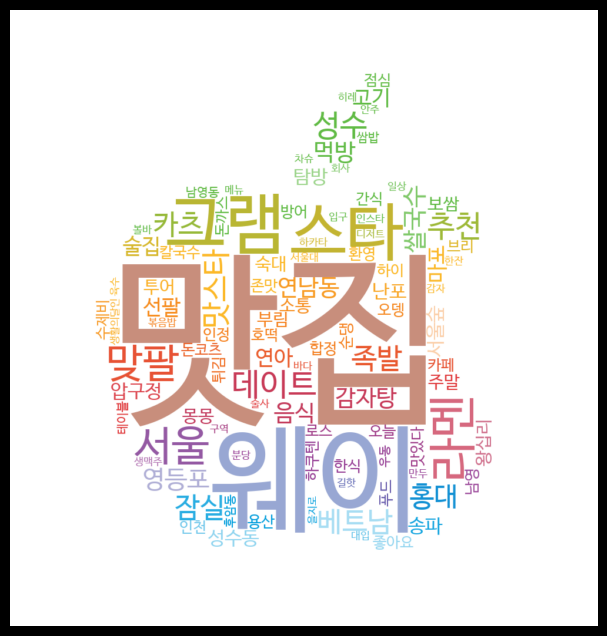

In [174]:
generate_wordcloud(text,'apple')

In [175]:
tabling_review = pd.read_csv("./ÌÖåÏù¥Î∏îÎßÅÏñ¥Ìîå Î¶¨Î∑∞.csv")
tabling_review

ÌèâÏ†ê                                                 Î¶¨Î∑∞
0      5                                              Î¶¨Î∑∞ ÏóÜÏùå
1      1                                              Î¶¨Î∑∞ ÏóÜÏùå
2      2  5Ïùº ÏóÖÎç∞Ïù¥Ìä∏ Ï†ÑÍπåÏßÄÎäî Î≥Ñ 5Í∞ú ÎìúÎ¶¥ Ïàò ÏûàÏùÑÎßåÌÅº Ïûò Ïì∞Í≥†ÏûàÏóàÎäîÎç∞ Í∞ëÏûêÍ∏∞ Ïõ¨ Ïó∞Îèà ...
3      5  Ïù¥Í±∞ ÎÑàÎ¨¥ Ï¢ãÏùÄ Îç∞ Ïô∏Íµ≠Î∂ÑÎì§ÎèÑ ÏÇ¨Ïö©Í∞ÄÎä•ÌïòÍ≤å ÎßåÎì§Ïñ¥ Ï£ºÏãúÎ©¥ Ïù¥ÌöåÏÇ¨Í∞Ä ÎçîÌÅ¨Í≤å Î∞úÏ†ÑÌïòÏßÄ ...
4      1  Ïï± ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÍ≥† ÏµúÏïÖÏùò Ïï±Ïù¥ ÎêòÏóàÎÑ§Ïöî^^;; ÏõêÍ≤© Ï§ÑÏÑúÍ∏∞ ÌïòÎ†§Î©¥ ÌÖåÏù¥Î∏îÎßÅÌéòÏù¥Í∞Ä ÌïÑ...
...   ..                                                ...
1094   1                                               Ïì∞Î†àÍ∏∞Ïï±
1095   1                                               Ïì∞Î†àÍ∏∞Ïï±
1096   1                                                ÂûÉÂúæÏï±
1097   5                                          Ï°∞~~~~~~~ÌÉÄ
1098   1                                                 Íµ¨Î¶º

[1099 rows x 2 columns]

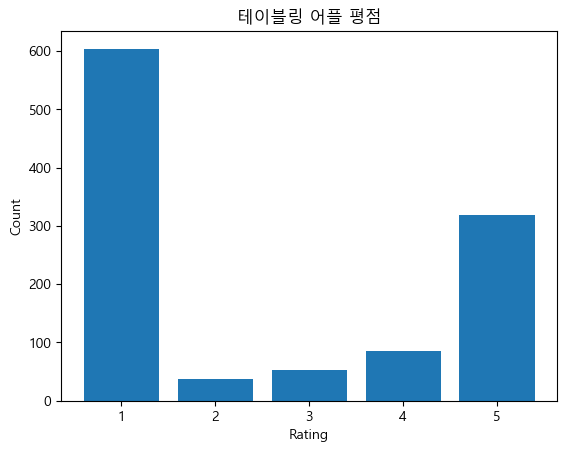

In [176]:
rating = tabling_review['ÌèâÏ†ê'].value_counts().sort_index()

plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('ÌÖåÏù¥Î∏îÎßÅ Ïñ¥Ìîå ÌèâÏ†ê')
plt.show()

### ÌèâÏ†êÏù¥ ÎÜíÏùÑÏàòÎ°ù Ï¢ãÏùÄÎç∞ 1Ï†ê ÌèâÏ†êÏù¥ ÏßÄÎ∞∞Ï†ÅÏúºÎ°ú ÎßéÏïòÎã§. Í∑∏Îü¨Î©¥ Î¶¨Î∑∞Ïùò Í≤ΩÏö∞Îäî Ïñ¥Îñ§ ÎÇ¥Ïö©Ïù¥ Ï£ºÎ•º Ïù¥Î§òÏùÑÍπå?

In [177]:
# Íµ¨Í∏Ä ÌîåÎ†àÏù¥Ïä§ÌÜ†Ïñ¥ Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖò Î¶¨Î∑∞Í∞Ä ÎßåÏïΩÏóê ÏóÜÏùÑ Í≤ΩÏö∞ Î¶¨Î∑∞ ÏóÜÏùå Ïù¥ÎùºÍ≥† ÎÇòÏôÄ ÏûàÎã§.

tabling_review = tabling_review[tabling_review['Î¶¨Î∑∞'] != 'Î¶¨Î∑∞ ÏóÜÏùå']
text = ','.join(tabling_review['Î¶¨Î∑∞']).replace(',','')
text

'5Ïùº ÏóÖÎç∞Ïù¥Ìä∏ Ï†ÑÍπåÏßÄÎäî Î≥Ñ 5Í∞ú ÎìúÎ¶¥ Ïàò ÏûàÏùÑÎßåÌÅº Ïûò Ïì∞Í≥†ÏûàÏóàÎäîÎç∞ Í∞ëÏûêÍ∏∞ Ïõ¨ Ïó∞Îèà Î©îÎâ¥ ÏÑ†ÌÉù Í∏∞Îä•ÏùÑ ÏòàÏïΩ Ï§ëÍ∞ÑÏóê ÌïòÎèÑÎ°ù ÎßåÎìúÏã†Í±¥ÏßÄ Î™®Î•¥Í≤†ÎÑ§Ïöî;; Í∞ÄÎú©Ïù¥ÎÇò 1Ï¥àÎèÑ ÏïÑÎãå ÎØ∏Î¶¨Ï¥àÎã®ÏúÑÎ°ú ÏÑ±Í≥µ Ïó¨Î∂ÄÍ∞Ä Í∞àÎ¶¨Í≥† Ïù∏Ïõê ÎßéÏùÑÏàòÎ°ù ÏòàÏïΩÌïòÍ∏∞ ÌûòÎì†Îç∞ 4Ïù∏Ïùò Í≤ΩÏö∞ Î©îÎâ¥ ÏÑ†ÌÉùÌïòÎäîÎç∞ ÎàÑÎ•¥Îäî ÏãúÍ∞Ñ ÎïåÎ¨∏Ïóê Îçî ÌûòÎì§Ïñ¥ÏßÄÍ≤†ÎÑ§Ïöî. Í∑∏Î¶¨Í≥† Ïù¥ÎØ∏ Ïù¥Ï†ÑÏóêÎèÑ Í∏∞Î≥∏Î©îÎâ¥ ÏÑ∏ÌåÖÏù¥ ÎêòÏñ¥ÏûàÏóàÍ≥† Î≥ÄÍ≤ΩÏùÑ Ìù¨ÎßùÌïòÎäî ÏÇ¨ÎûåÎßå Î≥ÑÎèÑÏûÖÎ†•Ìï¥ÏÑú ÌïòÎ©¥ ÎêêÏóàÎäîÎç∞ Ïôú Ïù¥Î†áÍ≤å ÏòàÏïΩÌïòÍ∏∞ Î≤àÍ±∞Î°≠Í≤å Î∞îÍæ∏Ïã†Í±¥ÏßÄ Ïù¥Ìï¥Í∞Ä ÏïàÎê©ÎãàÎã§. Í∑∏ÎÉ• Ïù¥Ï†ÑÏ≤òÎüº Î©îÎâ¥ ÏÑ†ÌÉù Í∏∞Îä• ÏóÜÏï†Ï£ºÏãúÍ±∞ÎÇò Ï∞®ÎùºÎ¶¨ Í≥µÏ†ïÌïòÍ≤å Î©îÎâ¥Ïπ∏ÎèÑ Ïù∏ÏõêÏàòÎ≥ÑÎ°ú Î∞òÎ∞ò Ìï¥ÏÑú Î≥ÑÎèÑÎ°ú ÏàòÏ†ïÌïòÍ±∞ÎÇò ÎàÑÎ•¥ÏßÄ ÏïäÍ≥†ÎèÑ Î∞îÎ°ú ÏòàÏïΩÌï† Ïàò ÏûàÎèÑÎ°ù ÎØ∏Î¶¨ ÏÑ∏ÌåÖÍ∞íÏùÑ ÏÑ§Ï†ïÌï¥Ï£ºÏÖ®ÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïöî. Ïö¥ÏòÅÏûêÎãò Ïù¥ Í∏Ä Î≥¥ÏãúÎ©¥ Î∂ÄÎîî Íº≠ Ï¢Ä ÏùòÍ≤¨ Î∞òÏòÅ Î∂ÄÌÉÅÎìúÎ¶ΩÎãàÎã§.Ïù¥Í±∞ ÎÑàÎ¨¥ Ï¢ãÏùÄ Îç∞ Ïô∏Íµ≠Î∂ÑÎì§Î

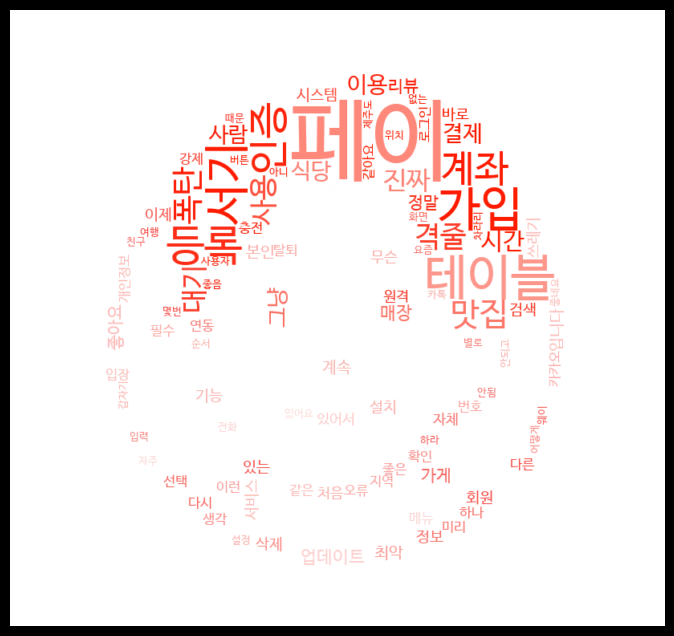

In [178]:
generate_wordcloud(text,"tabling")

### Ïõ®Ïù¥ÌåÖÎ¨∏Ï†úÎ•º Ìï¥ÏÜåÌï®Í≥º ÎèôÏãúÏóê Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Ï£ºÎ≥Ä ÏÉÅÍ∂åÎèÑ ÌôúÏÑ±Ìôî ÏãúÌÇ¨ Ïàò ÏûàÏùÑÍπå?

- Í∞ÄÍ∏âÏ†Å Ìï¥Îãπ Î¨∏Ï†úÎ•º Ïª¥Ìì®ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ÏÑú Ìï¥Í≤∞ÌïòÎäî Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÌï¥Î≥¥ÏïòÎã§.

- ÏßÄÎÇú ÏΩîÎ°úÎÇò19 Ïú†ÌñâÍ∏∞Í∞Ñ ÎèôÏïàÏóê Î∞±Ïã† ÏòàÎ∞©Ï†ëÏ¢ÖÏùÑ ÎèïÍ∏∞ ÏúÑÌï¥ÏÑú Ïπ¥Ïπ¥Ïò§ÏßÄÎèÑ, ÎÑ§Ïù¥Î≤ÑÏßÄÎèÑ ÏóêÏÑúÎäî Î∞±Ïã† ÏòàÏïΩÏù¥ Í∞ÄÎä•Ìïú Î≥ëÏõêÏùò ÏûîÏó¨Î∞±Ïã†ÏùÑ ÌëúÏãúÌïòÎäî Í∏∞Îä•Ïù¥ ÏûàÏóàÎã§. Í∑∏Î¶¨Í≥† Ïã§Ï†úÎ°ú Ïñ¥ÌîåÎ¶¨ÏºÄÏù¥ÏÖò ÎÇ¥Ïóê ÏûîÏó¨Î∞±Ïã†Ïù¥ ÎÇ®ÏïÑ ÏûàÎäî Î≥ëÏõêÏù¥ ÏûàÎã§Î©¥, Ìï¥Îãπ Î≥ëÏõêÏùÑ ÌÅ¥Î¶≠ÌïòÎ©¥ Î∞îÎ°ú ÏòàÏïΩÎèÑ Ìï† Ïàò ÏûàÎäî Í∏∞Îä• ÎòêÌïú ÏûàÏóàÎã§.

- Ïò§ÌîàÏÜåÏä§ Ï§ë YOLO ÎùºÍ≥† Object Detection Î™®Îç∏Ïù¥ ÏûàÏóàÍ≥† Ïù¥Î•º ÌÜµÌï¥ÏÑú Îß§Ïû• ÎÇ¥Ïóê ÏûàÎäî Í≥†Í∞ùÎì§Ïùò ÏàòÏôÄ, ÏãùÎãπ ÎÇ¥ ÏàòÏö©Í∞ÄÎä• Ïù∏ÏõêÏùÑ ÎπÑÍµêÌï¥ÏÑú ÍΩâÏ∞® ÏûàÍ±∞ÎÇò Ïõ®Ïù¥ÌåÖÏù¥ ÏûàÏùÑ Í≤ΩÏö∞ Ìï¥Îãπ ÏÉÅÌÉúÎ•º ÏßÄÎèÑÏóê ÌëúÍ∏∞Î•º ÌïòÎäî Í≤ÉÏùÑ Ï†úÏïàÌï¥Î≥∏Îã§.

- Í∞ÄÍ≤åÎ•º Î∞©Î¨∏ÌïòÍ∏∞Ï†Ñ Í∞ÄÍ≤åÏùò ÏÉÅÌÉúÎ•º Î≥¥Í≥† Ïõ®Ïù¥ÌåÖÏù¥ ÏûàÍ±∞ÎÇò, Í∞ÄÍ≤åÍ∞Ä ÎßéÏù¥ ÌòºÏû°Ìï† Í≤ΩÏö∞ Îã§Î•∏ ÎåÄÏïàÏùÑ ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. Ïõ®Ïù¥ÌåÖÏùÄ Í≥†Í∞ùÎì§ÏóêÍ≤å Í∑∏Î†áÍ≤å Ï¢ãÏùÄ Í≤ÉÎèÑ ÏïÑÎãàÍ≥†, Í∞ÄÍ≤å Ï†êÏ£ºÏùò ÏûÖÏû•ÏóêÏÑúÎèÑ Î∂ÄÎã¥Ïä§Îü¨Ïö¥ Í≤ÉÏùÄ ÏÇ¨Ïã§Ïù¥Îã§. Ïù¥Î•º Ìï¥ÏÜåÌï®Í≥º ÎèôÏãúÏóê, Ï£ºÎ≥ÄÏùò ÏãùÎãπÎì§Ïù¥ ÏòµÏÖòÏúºÎ°ú Îì§Ïñ¥Í∞êÏóê Îî∞Îùº Ï£ºÎ≥Ä ÏÉÅÍ∂åÏùò ÌôúÏÑ±ÌôîÎèÑ Í∏∞ÎåÄÌï¥Î≥º Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.